In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [3]:
# Parameters
num_prey = 30
space_size = 100
max_speed = 2
alignment_radius = 10
cohesion_radius = 10
separation_radius = 5
separation_strength = 0.05
alignment_strength = 0.05
cohesion_strength = 0.01

In [4]:
dt = 0.1  # Time step

# Initialize prey positions and velocities
positions = np.random.rand(num_prey, 2) * space_size
velocities = (np.random.rand(num_prey, 2) - 0.5) * max_speed

In [5]:
# Helper functions
def limit_speed(vector, max_speed):
    speed = np.linalg.norm(vector)
    if speed > max_speed:
        return (vector / speed) * max_speed
    return vector

def calculate_distance_matrix(positions):
    return np.linalg.norm(positions[:, np.newaxis] - positions, axis=2)

def update_positions(positions, velocities):
    return positions + velocities * dt

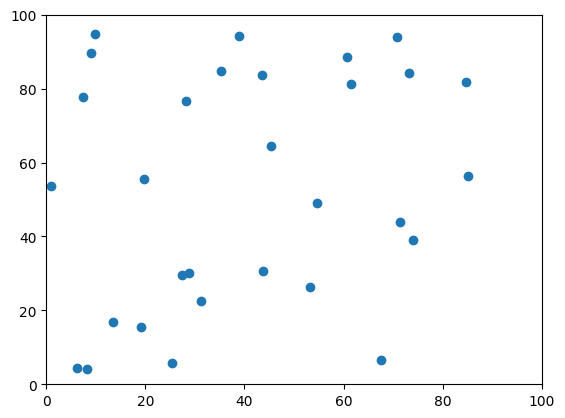

In [6]:
# Set up the figure and axis for animation
fig, ax = plt.subplots()
ax.set_xlim(0, space_size)
ax.set_ylim(0, space_size)
scat = ax.scatter(positions[:, 0], positions[:, 1])

In [7]:
# Update function for animation
def update(frame):
    global positions, velocities
    # Calculate distance matrix
    distance_matrix = calculate_distance_matrix(positions)

    # Initialize accelerations
    accelerations = np.zeros_like(velocities)

    for i in range(num_prey):
        neighbors = distance_matrix[i] < alignment_radius
        neighbors[i] = False  # Ignore self
        
        # Alignment: Match velocity with neighbors
        if np.any(neighbors):
            avg_velocity = np.mean(velocities[neighbors], axis=0)
            accelerations[i] += alignment_strength * (avg_velocity - velocities[i])
        
        # Cohesion: Move towards center of mass of neighbors
        neighbors = distance_matrix[i] < cohesion_radius
        neighbors[i] = False
        if np.any(neighbors):
            center_of_mass = np.mean(positions[neighbors], axis=0)
            accelerations[i] += cohesion_strength * (center_of_mass - positions[i])
        
        # Separation: Avoid getting too close to other prey
        neighbors = distance_matrix[i] < separation_radius
        neighbors[i] = False
        if np.any(neighbors):
            separation_vector = np.sum(positions[i] - positions[neighbors], axis=0)
            accelerations[i] += separation_strength * separation_vector

    # Update velocities and positions
    velocities += accelerations
    velocities = np.array([limit_speed(v, max_speed) for v in velocities])
    positions = update_positions(positions, velocities)

    # Update scatter plot
    scat.set_offsets(positions)
    return scat,


In [8]:
# Create animation
ani = FuncAnimation(fig, update, frames=500, interval=50, blit=True)

In [9]:
HTML(ani.to_jshtml())

In [10]:
plt.show()